In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.datasets import make_blobs
from sklearn.impute import SimpleImputer

In [2]:
with open('/Users/travelingshoes/Desktop/final_project_github/Weather data/Morgan_Weather_Data.xlsx', 'r', encoding='utf-8', errors='ignore') as f:
    data = f.read()

# Read in data from CSV file
morgan_data = pd.ExcelFile("Morgan_Weather_Data.xlsx")
#morgan_data = pd.read_csv('Morgan_Weather_Data.xlsx')

# Get the sheets
morgan_data.sheet_names



['Sheet1']

In [3]:
# Get the morgan_info from the crowdfunding_info worksheet. 
morgan_info_df = pd.read_excel(morgan_data, sheet_name='Sheet1')
morgan_info_df.head()

,Date,Morgan SWE,Dry = 0 Flooded =1 Not = 2,Hardscrabble (896) Snow Water Equivalent (in) Start of Day Values,Horse Ridge (533) Snow Water Equivalent (in) Start of Day Values,Kilfoil Creek (1145) Snow Water Equivalent (in) Start of Day Values,UTAH SWE,MorganTemp_Max (°F),MorganTemp_min (°F),MorganTemp_mean (°F),MorganPrecipitation_sum (inch),MorganRain_sum (inch),MorganSnowfall_sum (inch),MorganWindspeed_10m_max (mp/h)
0,1982-10-01,80.0,0,NaN,1.9,NaN,1.4,47.1,35.8,40.9,0.464,0.464,0.0,6.5
1,1982-10-02,80.0,0,NaN,2.2,NaN,1.4,56.4,34.9,45.7,0.000,0.000,0.0,5.6
2,1982-10-03,80.5,0,NaN,2.2,NaN,1.3,61.3,37.3,48.6,0.000,0.000,0.0,4.7
3,1982-10-04,81.0,0,NaN,1.9,NaN,1.3,64.8,41.3,51.9,0.094,0.094,0.0,9.1
4,1982-10-05,81.0,0,NaN,1.6,NaN,1.2,47.9,37.2,43.4,0.249,0.249,0.0,7.6


In [4]:
morgan_drop_info_df = morgan_info_df.dropna()
print(morgan_drop_info_df)

            Date  Morgan SWE   Dry = 0 Flooded =1 Not = 2  \
10121 2010-06-17         98.0                           0   
10122 2010-06-18         98.5                           0   
10123 2010-06-19         98.5                           0   
10124 2010-06-20         98.5                           0   
10125 2010-06-21         98.5                           0   
...          ...          ...                         ...   
14787 2023-03-27         54.0                           0   
14788 2023-03-28         54.0                           0   
14789 2023-03-29         54.0                           0   
14790 2023-03-30         53.0                           0   
14791 2023-03-31         52.5                           0   

       Hardscrabble (896) Snow Water Equivalent (in) Start of Day Values  \
10121                                                0.0                   
10122                                                0.0                   
10123                                  

In [21]:
X = morgan_drop_info_df[['Hardscrabble (896) Snow Water Equivalent (in) Start of Day Values', 'Horse Ridge (533) Snow Water Equivalent (in) Start of Day Values', 'Kilfoil Creek (1145) Snow Water Equivalent (in) Start of Day Values', 'UTAH SWE', 'MorganTemp_Max (°F)', 'MorganTemp_min (°F)', 'MorganTemp_mean (°F)', 'MorganPrecipitation_sum (inch)', 'MorganRain_sum (inch)', 'MorganSnowfall_sum (inch)', 'MorganWindspeed_10m_max (mp/h)']]
y = morgan_drop_info_df['Dry = 0 Flooded =1 Not = 2']

In [7]:
#Training
X 

,Hardscrabble (896) Snow Water Equivalent (in) Start of Day Values,Horse Ridge (533) Snow Water Equivalent (in) Start of Day Values,Kilfoil Creek (1145) Snow Water Equivalent (in) Start of Day Values,UTAH SWE,MorganTemp_Max (°F),MorganTemp_min (°F),MorganTemp_mean (°F),MorganPrecipitation_sum (inch),MorganRain_sum (inch),MorganSnowfall_sum (inch),MorganWindspeed_10m_max (mp/h)
10121,0.0,0.0,0.0,0.4,60.2,38.3,50.5,0.000,0.000,0.000,5.5
10122,0.0,0.0,0.0,0.4,73.1,40.2,58.2,0.000,0.000,0.000,5.7
10123,0.0,0.0,0.0,0.3,78.1,46.5,64.0,0.000,0.000,0.000,8.1
10124,0.0,0.0,0.0,0.2,77.9,50.3,66.2,0.000,0.000,0.000,11.0
10125,0.0,0.0,0.0,0.1,71.5,51.7,63.3,0.000,0.000,0.000,9.0
...,...,...,...,...,...,...,...,...,...,...,...
14787,34.1,30.6,20.7,26.8,30.0,17.2,23.3,0.144,0.000,0.994,5.2
14788,35.4,31.0,20.7,27.0,42.9,12.1,27.7,0.000,0.000,0.000,7.2
14789,35.4,31.0,20.7,27.0,48.3,26.9,36.4,0.236,0.155,0.580,9.9
14790,36.0,31.3,21.3,27.5,34.9,29.3,32.3,0.393,0.016,2.618,5.0


In [8]:
#Testing
y 

10121    0
10122    0
10123    0
10124    0
10125    0
        ..
14787    0
14788    0
14789    0
14790    0
14791    0
Name: Dry = 0 Flooded =1 Not = 2, Length: 4671, dtype: int64

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

In [12]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 1.0


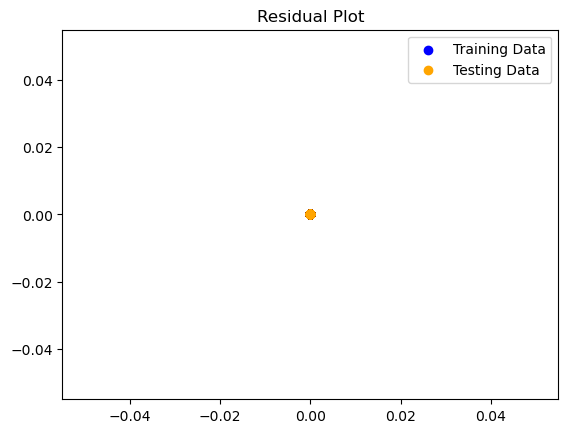

In [13]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()